In [27]:
import numpy as np

# data from https://apps.fas.usda.gov/gats/ExpressQuery1.aspx
world = np.array([18861872, 22839176, 21456288, 17058077, 18693613, 25516208, 27418050, 34352542])
china = np.array([10489267, 14203109,	12224950, 3120091, 8005228, 14068113, 14116249, 17917513])

In [28]:
import pandas as pd

us_futures = pd.read_csv("US Soybeans Futures Historical Data.csv")
us_futures['date'] =  pd.to_datetime(us_futures['Date'], format='mixed')
us_futures["Price"] = us_futures["Price"].str.replace(",","")
us_futures['Price'] = us_futures['Price'].astype(float) 
prices = us_futures.set_index("date")["Price"]
prices = prices[prices.index.month == 1].to_numpy()
prices = prices/100

In [29]:
volume_world = world/prices/36.74/1000
volume_china = china/prices/36.74/1000

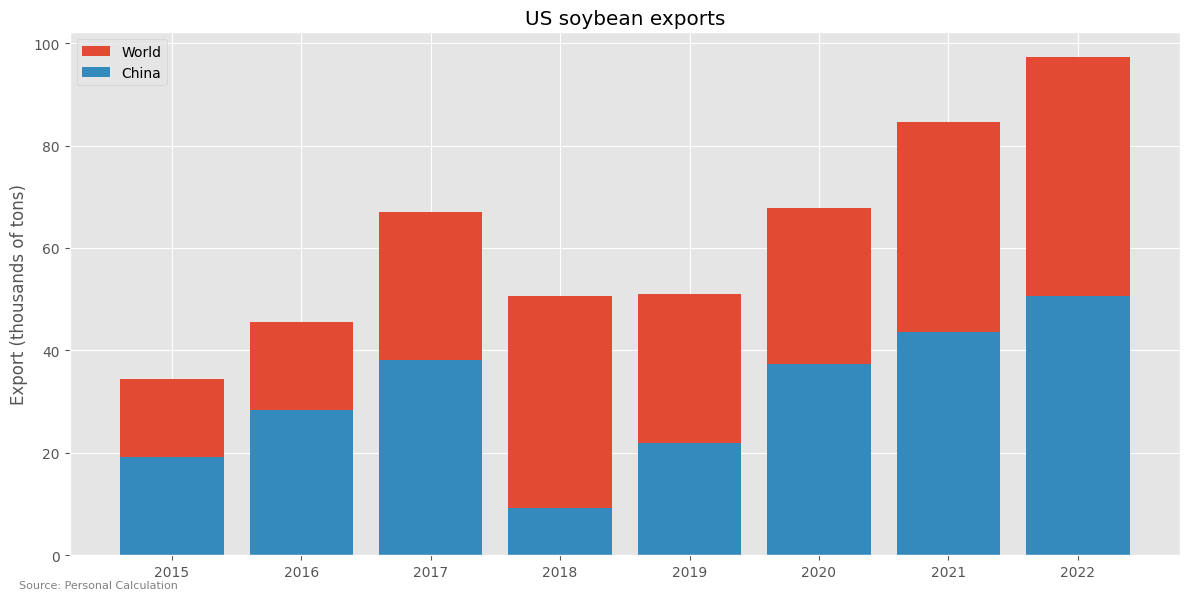

In [30]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

fig = plt.figure(figsize=(12, 6))

plt.bar(np.arange(2015, 2023), volume_world, label = "World")
plt.bar(np.arange(2015, 2023), volume_china, label = "China")

plt.title("US soybean exports")
plt.ylabel("Export (thousands of tons)")
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
fig.text(
    0.02,                   # X-coordinate (0.0 = far left, 1.0 = far right)
    0.01,                   # Y-coordinate (0.0 = bottom, 1.0 = top)
    "Source: Personal Calculation", 
    fontsize=8,             # Keep it small
    color='gray',
    ha='left'               # Horizontal alignment
)
plt.tight_layout()
plt.show()